## Create Latitude and Longitude Combinations

In [1]:
# Import the Pandas, Matplotlib, and NumPy dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
# Pack the latitudes (lats) and longitudes (lngs) as pairs by zipping them (lat_lngs) with the zip() function.
lat_lngs = zip(lats, lngs)
lat_lngs

The zip object packs each pair of lats and lngs having the same index in their respective array into a tuple. If there are 1,500 latitudes and longitudes, there will be 1,500 tuples of paired latitudes and longitudes, where each latitude and longitude in a tuple can be accessed by the index of 0 and 1, respectively.

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

You can only unzip a zipped tuple once before it is removed from the computer's memory. Make sure you unzip the latitudes and longitudes into the coordinates list before moving on.

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

3.169612939307413 123.13028826229538
-32.95940035890956 114.65567284759192
64.13180937881913 31.175063937501534
33.14061227812921 -78.48935575603532
5.947870464255928 149.251530756826
15.299451031895416 -106.29466056029341
73.20892042244125 -63.819065333604115
-32.493478554485236 21.132824850073717
53.78990462201867 -43.237291194764225
-61.868214614585376 148.432602052898
77.26454587181738 -163.0199531667176
74.23955947829086 -70.13705683970315
-8.070831616755925 -76.89269014508785
44.642910933998394 -85.03559563759134
-44.511432274338915 -42.29231279244479
13.249210620618427 113.13105419044928
-32.61398741764995 -158.624020014833
75.15843568602486 85.22239387528606
-32.00013239036528 -50.50731058166642
33.058756095488704 -135.59916882566122
1.8726391096507484 49.45113913283879
-77.10600568822221 -45.74391475952976
75.53310089134223 102.2766389437586
-43.41120397432511 161.9477526637068
77.95317709722647 74.37202021937358
-76.67556461194584 8.06340797090752
-81.27438731052308 17.100714

## Generate Random World Cities

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

606

## Get the City Weather Data
Let's use pseudocode to map out, at a high level, how we will get the weather data for each city for the website:

1. Import our dependencies and initialize counters and an empty list that will hold the weather data.
2. Loop through the cities list.
3. Group the cities in sets of 50 to log the process as we find the weather data for each city.
    - Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
4. Build the city_url or endpoint for each city.
5. Log the URL and the record and set numbers.
6. Make an API request for each city.
7. Parse the JSON weather data for the following:
    - City, country, and date
    - Latitude and longitude
    - Maximum temperature
    - Humidity
    - Cloudiness
    - Wind speed
8. Add the data to a list in a dictionary format and then convert the list to a DataFrame.

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | manado
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | muyezerskiy
Processing Record 4 of Set 1 | myrtle beach
Processing Record 5 of Set 1 | lorengau
Processing Record 6 of Set 1 | san patricio
Processing Record 7 of Set 1 | clyde river
Processing Record 8 of Set 1 | oudtshoorn
Processing Record 9 of Set 1 | nanortalik
Processing Record 10 of Set 1 | hobart
Processing Record 11 of Set 1 | barrow
Processing Record 12 of Set 1 | narsaq
Processing Record 13 of Set 1 | tocache
Processing Record 14 of Set 1 | cadillac
Processing Record 15 of Set 1 | chuy
Processing Record 16 of Set 1 | tuy hoa
Processing Record 17 of Set 1 | avarua
Processing Record 18 of Set 1 | dikson
Processing Record 19 of Set 1 | rio grande
Processing Record 20 of Set 1 | fortuna
Processing Record 21 of Set 1 | hobyo
Processing Record 22 of Set 1 | ushuaia
Processing Record 23 of Set 1 | khatanga
Processi

Processing Record 36 of Set 4 | djambala
Processing Record 37 of Set 4 | yerbogachen
Processing Record 38 of Set 4 | upernavik
Processing Record 39 of Set 4 | qaanaaq
Processing Record 40 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 41 of Set 4 | havoysund
Processing Record 42 of Set 4 | basoko
Processing Record 43 of Set 4 | sao joao da barra
Processing Record 44 of Set 4 | sorong
Processing Record 45 of Set 4 | utiroa
City not found. Skipping...
Processing Record 46 of Set 4 | bilibino
Processing Record 47 of Set 4 | oranjemund
Processing Record 48 of Set 4 | san luis
Processing Record 49 of Set 4 | cap malheureux
Processing Record 50 of Set 4 | louisbourg
City not found. Skipping...
Processing Record 1 of Set 5 | burica
City not found. Skipping...
Processing Record 2 of Set 5 | kyren
Processing Record 3 of Set 5 | cockburn town
Processing Record 4 of Set 5 | hualmay
Processing Record 5 of Set 5 | buritis
Processing Record 6 of Set 5 | vao
Processing Record 7 

Processing Record 24 of Set 8 | buchanan
Processing Record 25 of Set 8 | nilagiri
Processing Record 26 of Set 8 | catumbela
Processing Record 27 of Set 8 | tlaxiaco
City not found. Skipping...
Processing Record 28 of Set 8 | namibe
Processing Record 29 of Set 8 | acari
Processing Record 30 of Set 8 | nanga eboko
Processing Record 31 of Set 8 | jacareacanga
Processing Record 32 of Set 8 | whitehorse
Processing Record 33 of Set 8 | pesca
Processing Record 34 of Set 8 | bontang
Processing Record 35 of Set 8 | uglegorsk
Processing Record 36 of Set 8 | moose jaw
Processing Record 37 of Set 8 | najran
Processing Record 38 of Set 8 | tolga
Processing Record 39 of Set 8 | carikar
City not found. Skipping...
Processing Record 40 of Set 8 | wajir
Processing Record 41 of Set 8 | melo
Processing Record 42 of Set 8 | rurrenabaque
Processing Record 43 of Set 8 | chumikan
Processing Record 44 of Set 8 | egvekinot
Processing Record 45 of Set 8 | kon tum
Processing Record 46 of Set 8 | porto novo
Proce

Processing Record 13 of Set 12 | haibowan
City not found. Skipping...
Processing Record 14 of Set 12 | kirkenaer
Processing Record 15 of Set 12 | linaon
Processing Record 16 of Set 12 | plettenberg bay
Processing Record 17 of Set 12 | ajaccio
Processing Record 18 of Set 12 | leshukonskoye
Processing Record 19 of Set 12 | ewo
Processing Record 20 of Set 12 | cedar city
Processing Record 21 of Set 12 | birao
Processing Record 22 of Set 12 | dingle
Processing Record 23 of Set 12 | xushan
Processing Record 24 of Set 12 | urumqi
Processing Record 25 of Set 12 | eskasem
City not found. Skipping...
Processing Record 26 of Set 12 | sola
Processing Record 27 of Set 12 | neepawa
Processing Record 28 of Set 12 | balkanabat
Processing Record 29 of Set 12 | la ronge
Processing Record 30 of Set 12 | camacha
Processing Record 31 of Set 12 | yamada
Processing Record 32 of Set 12 | vysokogornyy
Processing Record 33 of Set 12 | santiago
Processing Record 34 of Set 12 | anadyr
Processing Record 35 of Set

In [13]:
len(city_data)

559

## Create a DataFrame of City Weather Data

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Manado,1.4870,124.8455,75.65,90,100,2.13,ID,2022-08-07 18:44:47
1,Busselton,-33.6500,115.3333,57.51,68,100,17.43,AU,2022-08-07 18:44:47
2,Muyezerskiy,63.9333,31.6500,51.30,82,55,6.46,RU,2022-08-07 18:44:47
3,Myrtle Beach,33.6891,-78.8867,90.27,77,0,9.22,US,2022-08-07 18:40:03
4,Lorengau,-2.0226,147.2712,80.49,79,100,7.09,PG,2022-08-07 18:44:48
5,San Patricio,28.0170,-97.5169,95.18,42,1,16.75,US,2022-08-07 18:44:48
6,Clyde River,70.4692,-68.5914,39.43,87,100,9.22,CA,2022-08-07 18:44:48
7,Oudtshoorn,-33.5907,22.2014,52.16,79,81,3.78,ZA,2022-08-07 18:44:49
8,Nanortalik,60.1432,-45.2371,45.32,81,10,8.88,GL,2022-08-07 18:44:49
9,Hobart,-42.8794,147.3294,38.05,94,5,8.05,AU,2022-08-07 18:40:08


In [16]:
# Reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Manado,ID,2022-08-07 18:44:47,1.4870,124.8455,75.65,90,100,2.13
1,Busselton,AU,2022-08-07 18:44:47,-33.6500,115.3333,57.51,68,100,17.43
2,Muyezerskiy,RU,2022-08-07 18:44:47,63.9333,31.6500,51.30,82,55,6.46
3,Myrtle Beach,US,2022-08-07 18:40:03,33.6891,-78.8867,90.27,77,0,9.22
4,Lorengau,PG,2022-08-07 18:44:48,-2.0226,147.2712,80.49,79,100,7.09
5,San Patricio,US,2022-08-07 18:44:48,28.0170,-97.5169,95.18,42,1,16.75
6,Clyde River,CA,2022-08-07 18:44:48,70.4692,-68.5914,39.43,87,100,9.22
7,Oudtshoorn,ZA,2022-08-07 18:44:49,-33.5907,22.2014,52.16,79,81,3.78
8,Nanortalik,GL,2022-08-07 18:44:49,60.1432,-45.2371,45.32,81,10,8.88
9,Hobart,AU,2022-08-07 18:40:08,-42.8794,147.3294,38.05,94,5,8.05


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

## Plot Latitude vs. Temperature

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

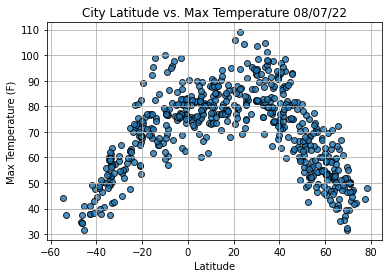

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

## Plot Latitude vs. Humidity

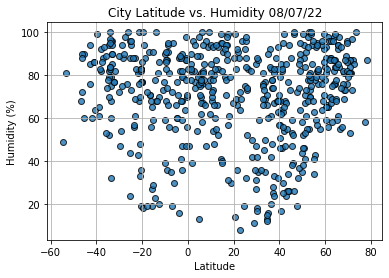

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

## Plot Latitude vs. Cloudiness

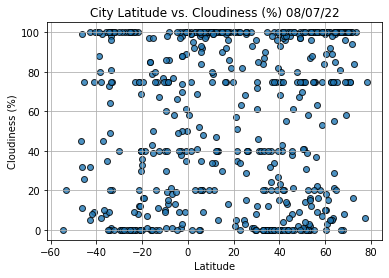

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

## Plot Latitude vs. Wind Speed

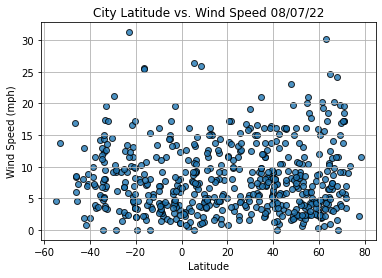

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

## Linear Regression to Find the Relationship Between Variables

In [25]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

We will add some code to perform regression analysis on the maximum temperatures in the Northern and Southern Hemispheres. To do this, we will need to create Northern Hemisphere DataFrames from the city_data_df DataFrame.

To create a new DataFrame from a current DataFrame, we can use the loc method on the current DataFrame. The loc method accesses a group of rows and columns in the current DataFrame by an index, labels, or a Boolean array. The syntax to get a specific row from a current DataFrame is row = df.loc[row_index].

In [27]:
index13 = city_data_df.loc[13]
index13

City                     Cadillac
Country                        US
Date          2022-08-07 18:44:50
Lat                       44.2519
Lng                      -85.4012
Max Temp                    75.11
Humidity                       94
Cloudiness                    100
Wind Speed                   5.75
Name: 13, dtype: object

We can also filter a DataFrame based on a value of a row. For instance, if we wanted to get all Northern Hemisphere latitudes, for latitudes greater than or equal to 0, we can filter the city_data_df DataFrame using the code city_data_df["Lat"] >= 0

In [28]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3       True
4      False
       ...  
554     True
555    False
556    False
557    False
558     True
Name: Lat, Length: 559, dtype: bool

In [29]:
# If we want to return a DataFrame with all data fitting the criteria, for latitudes greater than or equal to 0, we can use the loc method on the city_data_df DataFrame.
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Manado,ID,2022-08-07 18:44:47,1.4870,124.8455,75.65,90,100,2.13
2,Muyezerskiy,RU,2022-08-07 18:44:47,63.9333,31.6500,51.30,82,55,6.46
3,Myrtle Beach,US,2022-08-07 18:40:03,33.6891,-78.8867,90.27,77,0,9.22
5,San Patricio,US,2022-08-07 18:44:48,28.0170,-97.5169,95.18,42,1,16.75
6,Clyde River,CA,2022-08-07 18:44:48,70.4692,-68.5914,39.43,87,100,9.22
...,...,...,...,...,...,...,...,...,...
550,Ust-Kuyga,RU,2022-08-07 18:58:42,70.0167,135.6000,55.04,79,100,5.97
552,Shelby,US,2022-08-07 18:57:31,35.2001,-89.8668,94.08,60,40,6.91
553,Kousseri,CM,2022-08-07 18:58:43,12.0769,15.0306,73.36,94,40,14.97
554,Erdenet,MN,2022-08-07 18:59:43,49.0333,104.0833,51.10,82,0,2.82


In [30]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

### Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere

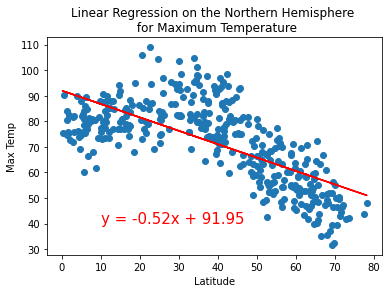

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 
                       'Max Temp',(10,40))

### Perform Linear Regression on the Maximum Temperature for the Southern Hemisphere

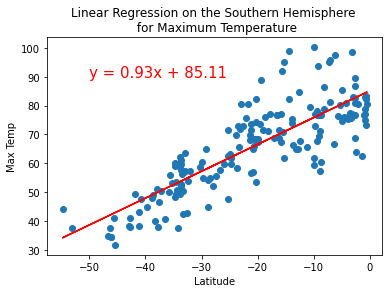

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 
                       'Max Temp',(-50,90))

Finding: The correlation between the latitude and the maximum temperature is strong to very strong because the r-value is less than –0.5 for the Northern Hemisphere and greater than 0.9 for the Southern Hemisphere, as shown by the plots here. This means that as we approach the equator, 0° latitude, the temperatures become warmer. And when we are further from the equator the temperatures become cooler.

### Perform Linear Regression on the Percent Humidity for the Northern Hemisphere

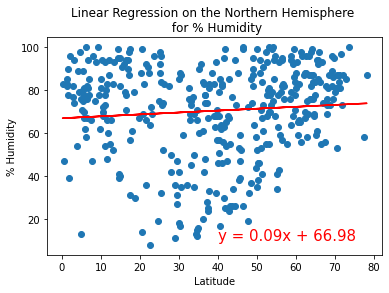

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', 
                       '% Humidity',(40,10))

### Perform Linear Regression on the Percent Humidity for the Southern Hemisphere

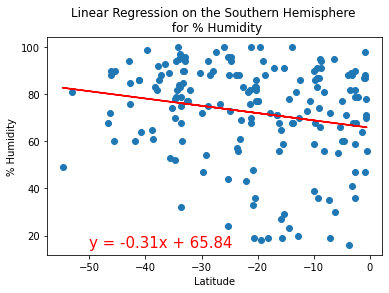

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', 
                       '% Humidity',(-50,15))

Finding: The correlation between the latitude and percent humidity is very low because the r-value is less than 0.09 for the Northern and Southern Hemispheres for the plots shown here. This means that percent humidity is unpredictable due to changing weather patterns that can increase or decrease percent humidity. 

### Perform Linear Regression on the Percent Cloudiness for the Northern Hemisphere

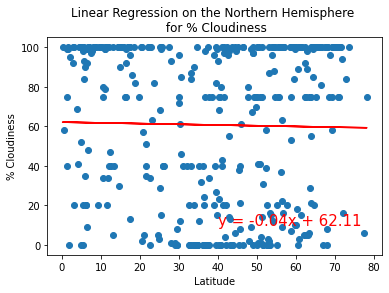

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness',(40,10))

### Perform Linear Regression on the Percent Cloudiness for the Southern Hemisphere

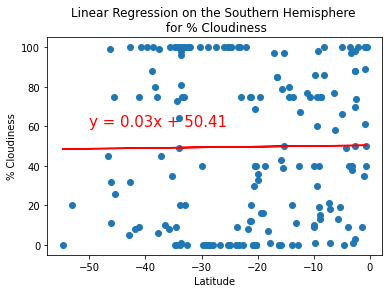

In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness',(-50,60))

Finding: The correlation between the latitude and percent cloudiness is very low because the r-value is less than –0.09 for the Northern Hemisphere and less than –0.02 for the Southern Hemisphere for the plots shown here. This means that cloudiness is unpredictable due to changing weather patterns that can increase or decrease percent cloudiness. Check the r-values for your plots. 

### Perform Linear Regression on the Wind Speed for the Northern Hemisphere

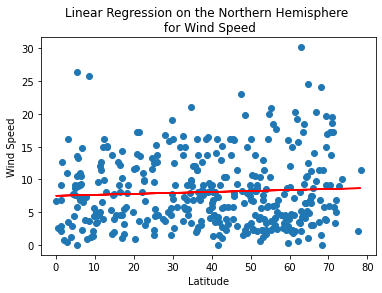

In [73]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 
                       'Wind Speed',(40,35))

### Perform Linear Regression on the Wind Speed for the Southern Hemisphere

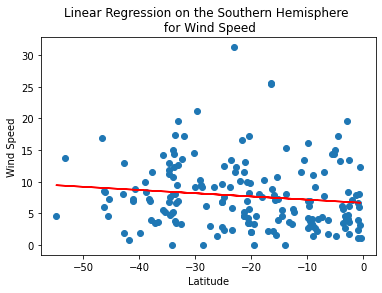

In [71]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 
                       'Wind Speed',(-50,35))

Finding: The correlation between the latitude and wind speed is very low because the r-value is less  than –0.07 for the Northern Hemisphere and less than –0.3 for the Southern Hemisphere for the plots shown here. This means that wind speed is unpredictable due to changing weather patterns that can increase or decrease wind speed. 